# EECS 3401 Final Project
## Authors: Abbey McMillan, Asher McCreaady

## Project Description
For this project, we will be using a dataset that holds information about food delivery times. We look at attributes such as delivery person age, ratings, restaurant location, delivery location, type of meal, vehicle type, and time taken. We will be using a supervised learning model to attempt to predict the time it will take in minutes to deliver a meal.

### Installing the Dataset and relevant packages

In [46]:
#imports
!pip install opendatasets
!pip install pandas
!pip install seaborn
!pip install scikit-plot==0.3.7
!pip install numpy

import opendatasets as od
import pandas as pd
import seaborn as sns
import numpy as np

od.download("https://www.kaggle.com/datasets/rajatkumar30/food-delivery-time")

Skipping, found downloaded files in "./food-delivery-time" (use force=True to force download)


"username":"ashermcc","key":"b65575bb4354cc59cecf3b7a2ca29443"

### Making the dataset a pandas dataframe

In [47]:
#reading the CSV file and putting it into a pandas df object
df = pd.read_csv('/content/food-delivery-time/deliverytime.csv')


### Starting exploratory data analysis

In [48]:

#.info shows information about column names and their respective data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [49]:
#.shape returns the number of rows and columns
df.shape

(45593, 11)

In [50]:
#.describe shows information on all numerical attributes
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [51]:
#.head shows the first five rows of the dataset
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


array([[<Axes: title={'center': 'Delivery_person_Age'}>,
        <Axes: title={'center': 'Delivery_person_Ratings'}>,
        <Axes: title={'center': 'Restaurant_latitude'}>],
       [<Axes: title={'center': 'Restaurant_longitude'}>,
        <Axes: title={'center': 'Delivery_location_latitude'}>,
        <Axes: title={'center': 'Delivery_location_longitude'}>],
       [<Axes: title={'center': 'Time_taken(min)'}>, <Axes: >, <Axes: >]],
      dtype=object)

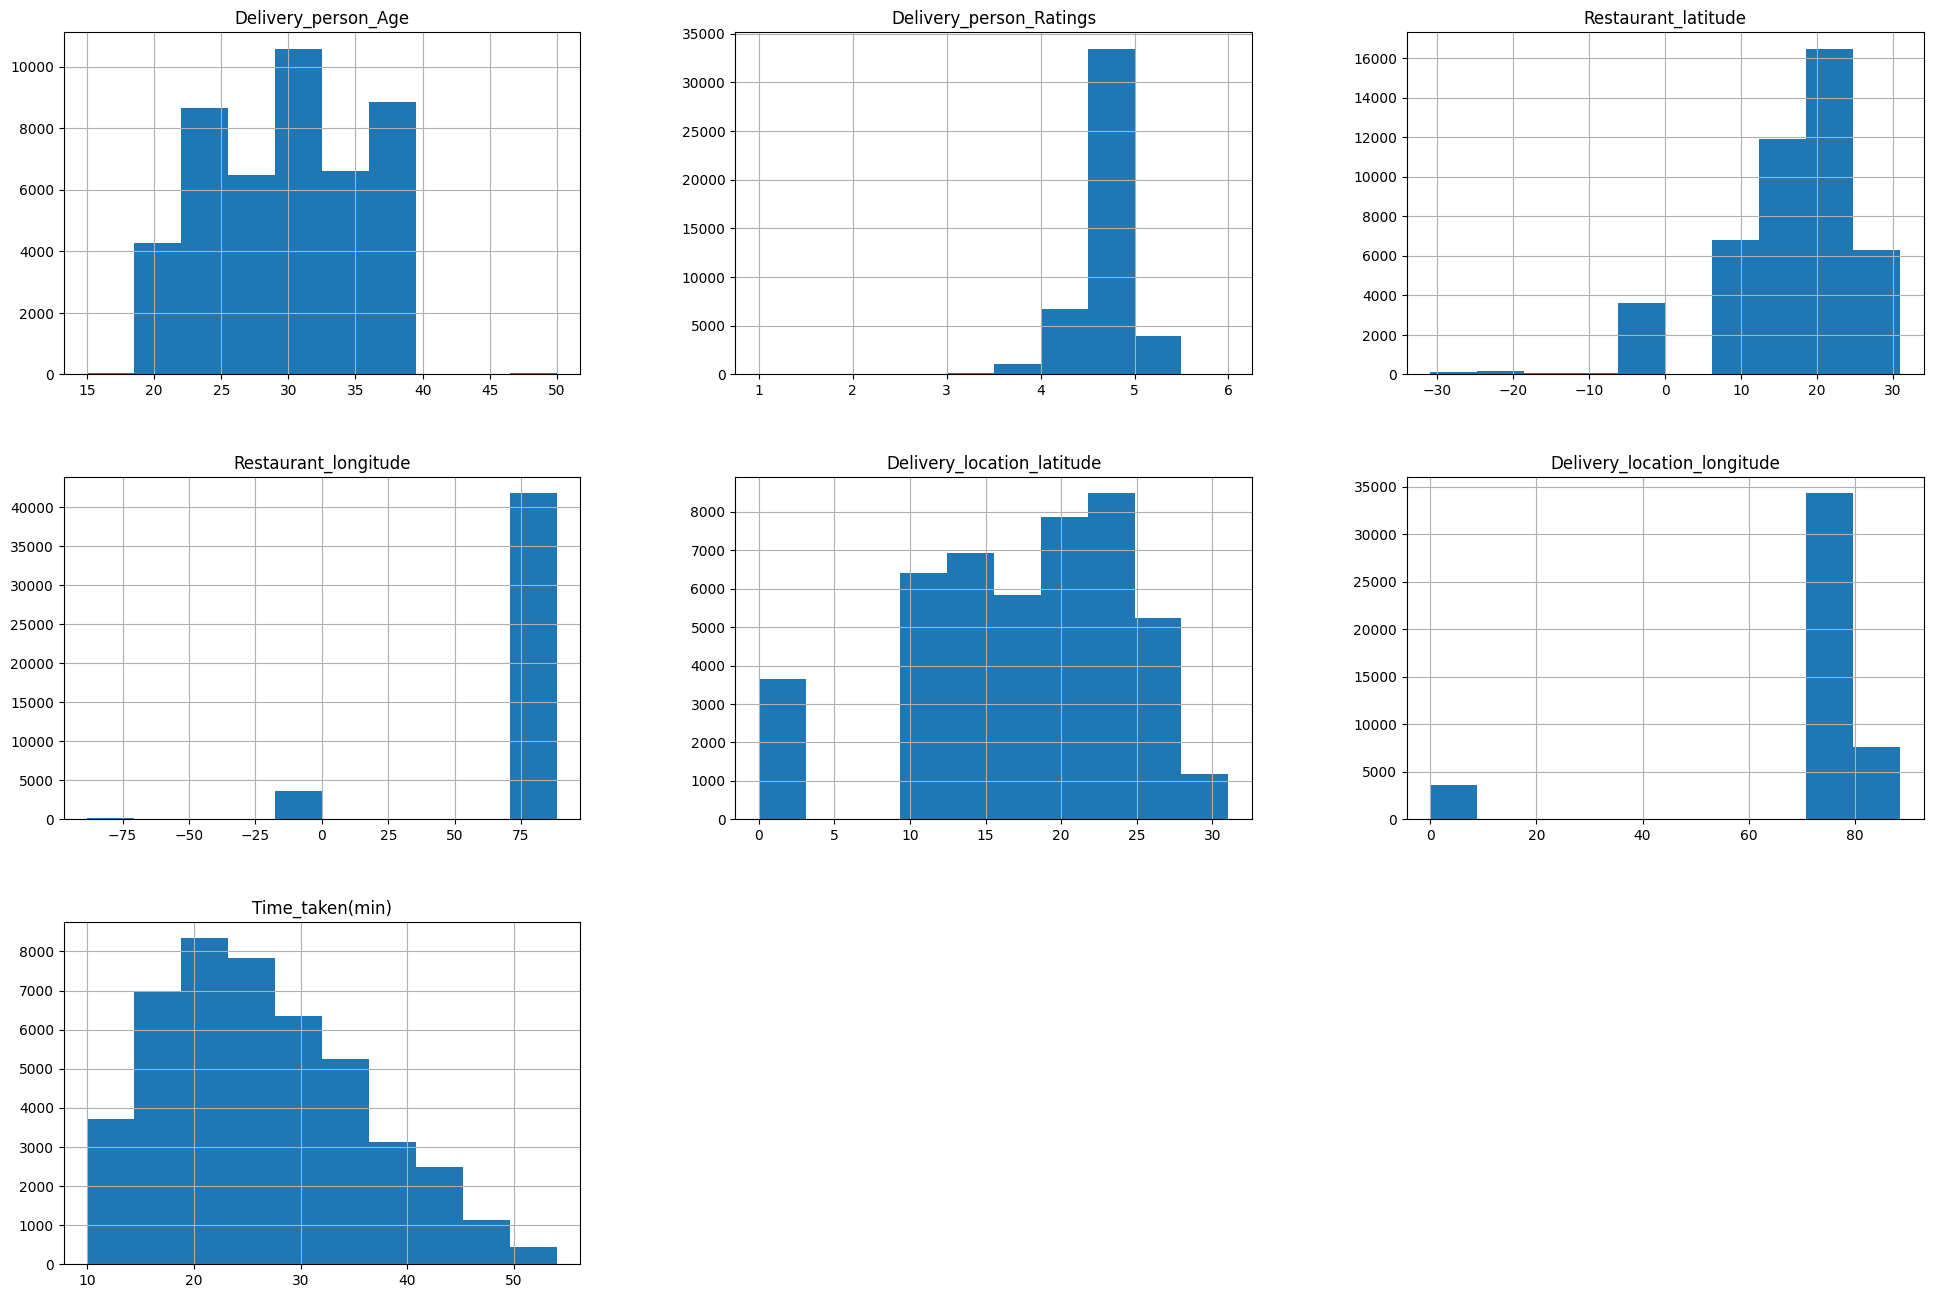

In [52]:
#.hist displays a histogram of all numerical attributes
df.hist(figsize=(24, 16))

<Axes: xlabel='Type_of_vehicle', ylabel='count'>

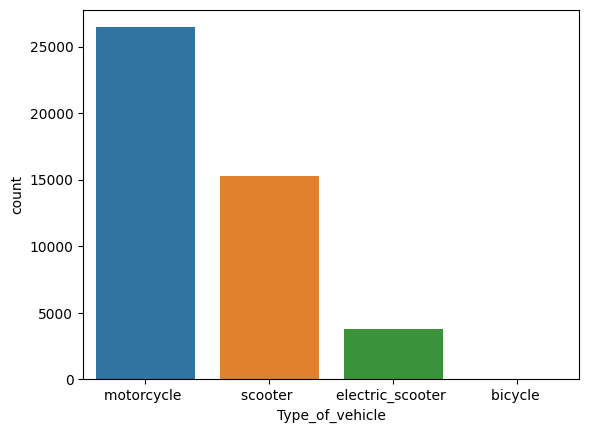

In [53]:
#.countplot shows the number of occurences of a specific categorical attribute
sns.countplot(data = df, x = 'Type_of_vehicle')

<Axes: xlabel='Type_of_order', ylabel='count'>

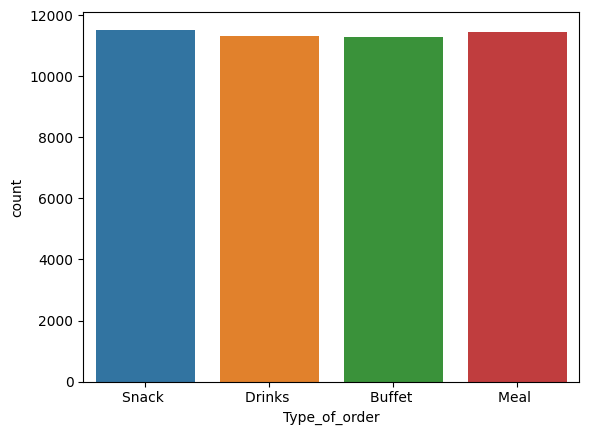

In [54]:
sns.countplot(data = df, x = 'Type_of_order')

<Axes: xlabel='Type_of_order', ylabel='Time_taken(min)'>

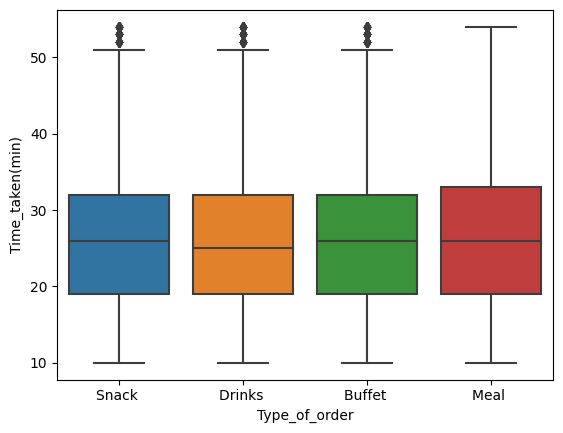

In [55]:
#.boxplot puts categorical and numerical attributes on the same dimension. here we are using it to compare it to our target attributes
sns.boxplot(data = df, x = 'Type_of_order', y = 'Time_taken(min)')

<Axes: xlabel='Type_of_vehicle', ylabel='Time_taken(min)'>

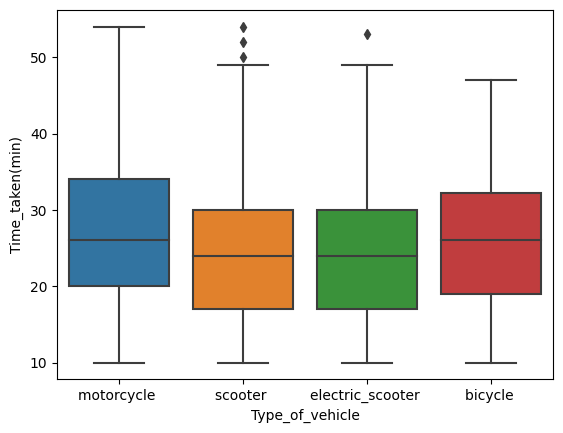

In [56]:
sns.boxplot(data = df, x = 'Type_of_vehicle', y = 'Time_taken(min)')

In [57]:
df['Restaurant_latitude'].lt(1).sum()#for some reason, if a datapoint has an aberrant longditude value, it's either in the restaurant latitude section, or in both the restaurant latitude section and somewhere else
#so checking restaurant latitude is akin to checking all coordinates


4071

In [58]:
df['Delivery_location_longitude'].lt(1).sum()

3640

### Removing problematic values

This must be done before splitting the target and feature data, so the whole datapoint is removed at once

In [59]:
df_rlat_cleaned = df.copy() #makes a clean version of the data, fully removing any examples of latitude/longditude combinations that make little sense
df_rlat_cleaned.drop(df_rlat_cleaned[df_rlat_cleaned['Restaurant_latitude'] < 1].index, inplace = True)
df_rlat_cleaned=df_rlat_cleaned.reset_index() #you have no idea how much trouble this gave me before i realized i needed to do this, and how to do it

In [60]:
df_rlat_cleaned['Restaurant_latitude'].lt(1).sum() #removes the 4071 cases of aberrant coordinates

0

### Feature engineering

Using the equirectangular approximation to give a measure of the distance from the restaurant to the delivery site

In [61]:
from numpy import sqrt
df_rlat_cleaned['lat_dif'] = 0
df_rlat_cleaned['long_dif'] = 0
df_rlat_cleaned['pyth_dif'] = 0

for index,row in df_rlat_cleaned.iterrows():
  a = abs(row['Restaurant_latitude']-row['Delivery_location_latitude'])
  df_rlat_cleaned.loc[index,'lat_dif'] = a
  b = abs(row['Restaurant_longitude']-row['Delivery_location_longitude'])
  df_rlat_cleaned.loc[index,'long_dif'] = b
  df_rlat_cleaned.loc[index,'pyth_dif'] = sqrt(a**2+b**2)


In [62]:
#outputting the cleaned data
df_rlat_cleaned.head()

,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),lat_dif,long_dif,pyth_dif
0,0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,0.02,0.02,0.028284
1,1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,0.13,0.13,0.183848
2,2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,0.01,0.01,0.014142
3,3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,0.05,0.05,0.070711
4,4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,0.04,0.04,0.056569


### Split into target and feature
y=target (delivery time), X=feature (everything else)

In [63]:
#splitting into target and feature variables
y=pd.DataFrame(df_rlat_cleaned['Time_taken(min)'])
X=df_rlat_cleaned.drop('Time_taken(min)',axis=1)

### Data Preprocessing

Scale numeric data, one hot encode categorical data, remove ID numbers, as they are irrelevant and interfere with one hot encoding

In [64]:
# much of the code here is loosely based on the code from my (asher mccready) assignment 2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
X_prepared = X.copy(); #version of x to be processed

X_prepared.drop('ID',axis=1,inplace=True)
X_prepared.drop('Delivery_person_ID',axis=1,inplace=True)

scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False)
numcol = X_prepared.select_dtypes('number').columns
catcol = X_prepared.select_dtypes('object').columns


for c in numcol:
  X_prepared[c]=scaler.fit_transform(X_prepared[c].to_numpy().reshape(-1,1))

enc_cat = pd.DataFrame(encoder.fit_transform(X_prepared[catcol]))

X_prepared = X_prepared.join(enc_cat)

for c in catcol:
 X_prepared.drop(c,axis=1,inplace=True)

print(X_prepared.shape)

X_prepared.columns = X_prepared.columns.astype(str)

(41522, 18)


In [65]:
#outputting a summmary of X_prepared variable
X_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41522 entries, 0 to 41521
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        41522 non-null  float64
 1   Delivery_person_Age          41522 non-null  float64
 2   Delivery_person_Ratings      41522 non-null  float64
 3   Restaurant_latitude          41522 non-null  float64
 4   Restaurant_longitude         41522 non-null  float64
 5   Delivery_location_latitude   41522 non-null  float64
 6   Delivery_location_longitude  41522 non-null  float64
 7   lat_dif                      41522 non-null  float64
 8   long_dif                     41522 non-null  float64
 9   pyth_dif                     41522 non-null  float64
 10  0                            41522 non-null  float64
 11  1                            41522 non-null  float64
 12  2                            41522 non-null  float64
 13  3               

In [66]:
#.tail outputs the last 5 values in the dataset
X_prepared.tail()

,index,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,lat_dif,long_dif,pyth_dif,0,1,2,3,4,5,6,7
41517,1.733103,0.960560,-1.334388,0.819330,2.408568,0.827541,2.421707,1.260535,1.260535,1.260535,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41518,1.733179,0.081604,0.521661,1.465925,-0.320639,1.455616,-0.335984,-1.459822,-1.459822,-1.459822,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
41519,1.733331,0.081604,0.831002,-1.075737,0.952751,-1.081543,0.943065,-0.915751,-0.915751,-0.915751,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
41520,1.733407,-1.676306,0.212319,-1.445753,0.020593,-1.449606,0.013818,-0.643715,-0.643715,-0.643715,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41521,1.733483,-1.148933,0.831002,0.815624,2.407955,0.818345,2.412507,0.444428,0.444428,0.444428,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Splitting the data into 80% training, 20% testing set

In [67]:
#splitting the data into 80% training, 20% testing, from Asher McCready assignment 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33217, 18) (8305, 18) (33217, 1) (8305, 1)


### Training


#### 1st model: Support Vector Regression (SVR)

In [68]:
#training the data using SVM model
from sklearn.svm import SVR
model_svm = SVR(C=10, gamma=0.01) #from assignment 2
model_svm.fit(X_train, y_train.values.ravel())

SVR(C=10, gamma=0.01)

In [69]:
y_predict = model_svm.predict(X_test)

Model evaluation

In [70]:
#ouputting the r^2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.3005414402049641

In [71]:
#outputting the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict)

61.840365697804266

In [72]:
#ouputting the mean absolute error
from sklearn.metrics import mean_absolute_error as mae
mae_svr = mae(y_test, y_predict)
print (mae_svr)

6.163460620935356


#### Second model: Multilayer Perceptron Neural Network (MLP Neural Network)

In [73]:
#training the data using a MLP neural network
from sklearn.neural_network import MLPRegressor
model_mlp = MLPRegressor(hidden_layer_sizes = (20,20,20,20),random_state=1, max_iter=1000)
model_mlp.fit(X_train, y_train.values.ravel())

MLPRegressor(hidden_layer_sizes=(20, 20, 20, 20), max_iter=1000, random_state=1)

Text(0, 0.5, 'Loss')

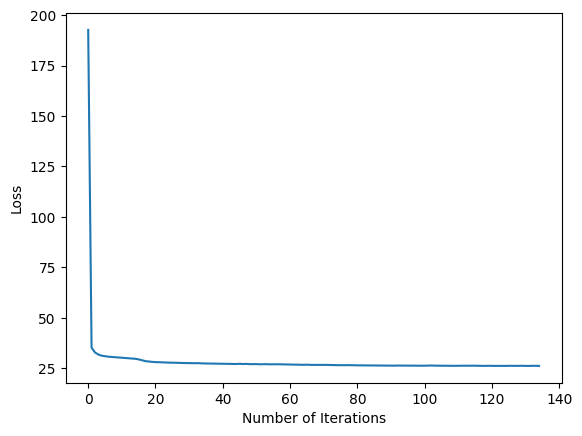

In [74]:
#printing a loss curve for MLP neural network
import matplotlib.pyplot as plt
plt.plot(model_mlp.loss_curve_)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")

In [75]:
#predicting
y_predicttest = model_mlp.predict(X_test)

Model Evaluation

In [76]:
#outputting the r^2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_predicttest)

0.3888099574185818

In [77]:
#outputting the mean squared error
mean_squared_error(y_test, y_predicttest)


54.036390311910665

In [78]:
#outputting the mean average error
mae_mlptest = mae(y_test, y_predicttest)
print (mae_mlptest)

5.789220168148377


#### Model 3: SGD Regressor model

In [79]:
#imports
from sklearn.linear_model import SGDRegressor

In [80]:
#initializing the model
model_sgdr = SGDRegressor()

In [81]:
#training the data
model_sgdr.fit(X_train, y_train.values.ravel())

SGDRegressor()

In [82]:
#predicting
y_predict = model_sgdr.predict(X_test)

Model evaluation

In [83]:
#outputting the r squared score
sgdr_score = model_sgdr.score(X_train, y_train.values.ravel())
sgdr_score

0.29843374768038977

In [84]:
#outputting the mean squared error
mean_squared_error(y_test, y_predict)


63.734086135389695

In [85]:
#outputting the mean average error
mae_sgdr = mae(y_test, y_predict)
print (mae_sgdr)

6.346260238133973


### Optimizing the architecture of the MLP neural network
The neural network is clearly the best, let's optimise the architecture

In [86]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

#### 1 Layer:

Text(0.5, 1.0, 'Number of Neurons vs R squared score comparison with 1 layer')

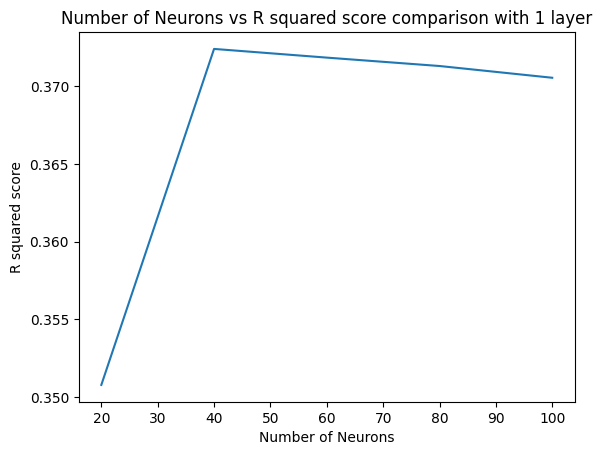

In [87]:
from sklearn.metrics import r2_score
layers = [20,40,60,80,100]
results = []
for l in layers:
  model_mlp_neurontesting = MLPRegressor(hidden_layer_sizes = (l),random_state=1, max_iter=1000)
  model_mlp_neurontesting.fit(X_train, y_train.values.ravel())
  y_pt_nt = model_mlp_neurontesting.predict(X_test)
  results.append(r2_score(y_test,y_pt_nt))
plt.plot(layers,results)
plt.xlabel("Number of Neurons")
plt.ylabel("R squared score")
plt.title("Number of Neurons vs R squared score comparison with 1 layer")


#### Two layers:

Text(0.5, 1.0, 'Number of Neurons vs R squared score comparison with 2 layers')

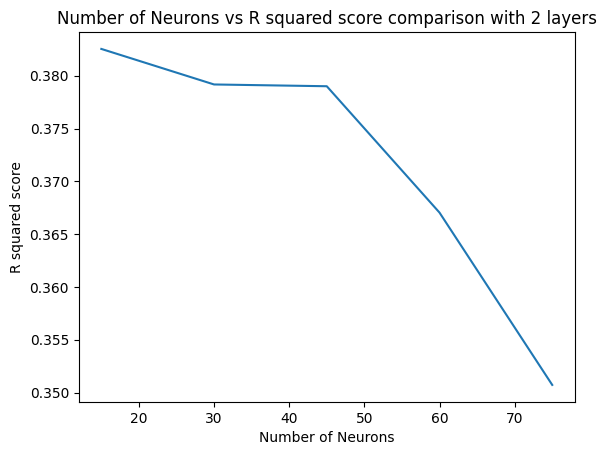

In [88]:
from sklearn.metrics import r2_score
layers = [15,30,45,60,75]
results = []
for l in layers:
  model_mlp_neurontesting = MLPRegressor(hidden_layer_sizes = (l,l),random_state=1, max_iter=1000)
  model_mlp_neurontesting.fit(X_train, y_train.values.ravel())
  y_pt_nt = model_mlp_neurontesting.predict(X_test)
  results.append(r2_score(y_test,y_pt_nt))
plt.plot(layers,results)
plt.xlabel("Number of Neurons")
plt.ylabel("R squared score")
plt.title("Number of Neurons vs R squared score comparison with 2 layers")

#### Three layers:

Text(0.5, 1.0, 'Number of Neurons vs R squared score comparison with 3 layers')

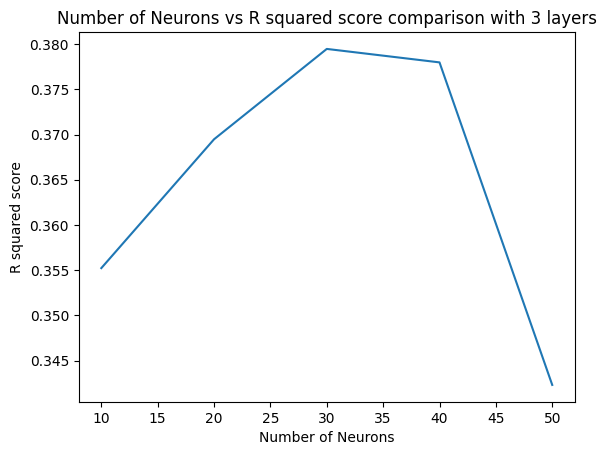

In [89]:
from sklearn.metrics import r2_score
layers = [10,20,30,40,50]
results = []
for l in layers:
  model_mlp_neurontesting = MLPRegressor(hidden_layer_sizes = (l,l,l),random_state=1, max_iter=1000)
  model_mlp_neurontesting.fit(X_train, y_train.values.ravel())
  y_pt_nt = model_mlp_neurontesting.predict(X_test)
  results.append(r2_score(y_test,y_pt_nt))
plt.plot(layers,results)
plt.xlabel("Number of Neurons")
plt.ylabel("R squared score")
plt.title("Number of Neurons vs R squared score comparison with 3 layers")

#### Four layers:

Text(0.5, 1.0, 'Number of Neurons vs R squared score comparison with 4 layers')

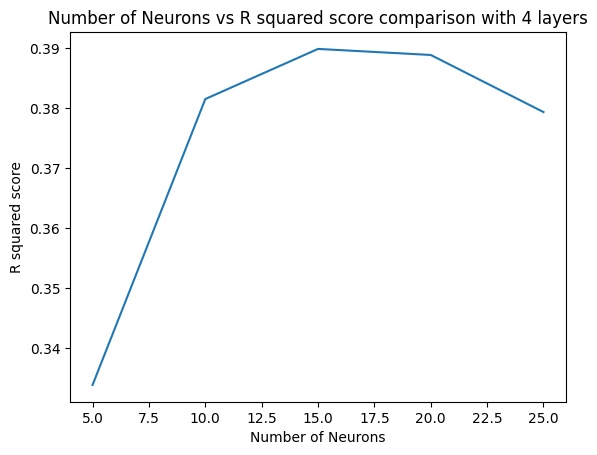

In [90]:
from sklearn.metrics import r2_score
layers = [5,10,15,20,25]
results = []
for l in layers:
  model_mlp_neurontesting = MLPRegressor(hidden_layer_sizes = (l,l,l,l),random_state=1, max_iter=1000)
  model_mlp_neurontesting.fit(X_train, y_train.values.ravel())
  y_pt_nt = model_mlp_neurontesting.predict(X_test)
  results.append(r2_score(y_test,y_pt_nt))
plt.plot(layers,results)
plt.xlabel("Number of Neurons")
plt.ylabel("R squared score")
plt.title("Number of Neurons vs R squared score comparison with 4 layers")

### Conclusion

That's it for the coding part of the project. We further analyse and discuss results, performance, and findings in the Project Report.